<a href="https://colab.research.google.com/github/Badar97/Progetto_DataScience/blob/main/2-Python/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot
import matplotlib.dates

from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
url = "https://raw.githubusercontent.com/Badar97/Progetto_DataScience/main/Python/NorwayMeteoDataCompleted.csv"
meteo = pd.read_csv(url)
meteo.drop(['Unnamed: 0'], inplace=True, axis=1)


print ( 'dimensione dataset iniziale: ' + str(meteo.shape) )


meteo = meteo.dropna()
meteo.isna().sum().sum()

print ( 'dimensione dataset senza NaN: ' + str(meteo.shape) )

newname = {'sourceId': 'sourceID', 'latitude': 'Latitude', 'longtitude': 'Longitude',
           'max(air_temperature P1D)': 'max_air_temp_perday', 'max(relative_humidity P1D)': 'max_rel_hum_perday', 
           'max(wind_speed P1D)': 'max_wind_speed_perday','mean(air_temperature P1D)': 'mean_air_temp_perday',
           'mean(relative_humidity P1D)': 'mean_rel_hum_perday', 'mean(wind_speed P1D)': 'mean_wind_speed_perday', 
           'sum(precipitation_amount P1D)': 'sum_precip_amount_perday', 'day': 'Day', 'month': 'Month', 'year': 'Year'}
meteo.rename(columns=newname, inplace=True)

cols=['Year', 'Month', 'Day']
meteo['Date'] = meteo[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
meteo['Date']=pd.to_datetime(meteo['Date'])
meteo.head()

dimensione dataset iniziale: (237629, 13)
dimensione dataset senza NaN: (21799, 13)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,sourceID,Latitude,Longitude,max_air_temp_perday,max_rel_hum_perday,max_wind_speed_perday,mean_air_temp_perday,mean_rel_hum_perday,mean_wind_speed_perday,sum_precip_amount_perday,Day,Month,Year,Date
34,SN69100,63.4597,10.9305,-2.3,83.0,4.1,-8.50,79.0,3.0,0.00,1,1,2010,2010-01-01
40,SN91380,69.3875,20.2823,-9.2,86.0,5.1,-11.75,71.0,2.6,0.30,1,1,2010,2010-01-01
41,SN91740,69.7887,20.9553,-8.4,72.0,8.9,-10.90,67.0,6.9,0.00,1,1,2010,2010-01-01
80,SN69100,63.4597,10.9305,-13.4,84.0,4.6,-15.15,82.0,3.6,0.00,2,1,2010,2010-01-02
86,SN91380,69.3875,20.2823,-8.7,79.0,3.3,-12.35,73.0,2.3,0.15,2,1,2010,2010-01-02


In [ ]:
# Check the overall info
meteo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21799 entries, 34 to 235248
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   sourceID                  21799 non-null  object        
 1   Latitude                  21799 non-null  float64       
 2   Longitude                 21799 non-null  float64       
 3   max_air_temp_perday       21799 non-null  float64       
 4   max_rel_hum_perday        21799 non-null  float64       
 5   max_wind_speed_perday     21799 non-null  float64       
 6   mean_air_temp_perday      21799 non-null  float64       
 7   mean_rel_hum_perday       21799 non-null  float64       
 8   mean_wind_speed_perday    21799 non-null  float64       
 9   sum_precip_amount_perday  21799 non-null  float64       
 10  Day                       21799 non-null  int64         
 11  Month                     21799 non-null  int64         
 12  Year            

In [ ]:
# Check the numerical data stats
meteo.describe()

,Latitude,Longitude,max_air_temp_perday,max_rel_hum_perday,max_wind_speed_perday,mean_air_temp_perday,mean_rel_hum_perday,mean_wind_speed_perday,sum_precip_amount_perday,Day,Month,Year
count,21799.000000,21799.000000,21799.000000,21799.000000,21799.00000,21799.000000,21799.000000,21799.000000,21799.000000,21799.000000,21799.000000,21799.000000
mean,64.599659,13.022391,8.533641,88.594431,5.40861,4.431719,73.812514,2.835263,2.204613,15.728382,6.536997,2015.689527
std,3.730493,5.557071,8.741083,9.456778,3.04478,8.129394,12.255695,1.889884,5.229464,8.800776,3.421407,3.233849
min,59.417500,6.217500,-25.700000,31.000000,0.00000,-27.950000,20.000000,0.000000,0.000000,1.000000,1.000000,2010.000000
25%,62.017200,8.200000,2.500000,85.000000,3.30000,-0.700000,65.000000,1.500000,0.000000,8.000000,4.000000,2013.000000
50%,63.459700,10.930500,8.400000,92.000000,4.80000,4.700000,75.000000,2.400000,0.250000,16.000000,7.000000,2016.000000
75%,69.387500,20.282300,15.100000,95.000000,6.90000,10.750000,83.000000,3.700000,2.000000,23.000000,10.000000,2018.000000
max,69.788700,20.955300,34.300000,101.000000,26.30000,27.500000,100.000000,16.200000,122.400000,31.000000,12.000000,2021.000000


In [ ]:
meteo.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Latitude,Longitude,max_air_temp_perday,max_rel_hum_perday,max_wind_speed_perday,mean_air_temp_perday,mean_rel_hum_perday,mean_wind_speed_perday,sum_precip_amount_perday,Day,Month,Year
count,21799.000000,21799.000000,21799.000000,21799.000000,21799.00000,21799.000000,21799.000000,21799.000000,21799.000000,21799.000000,21799.000000,21799.000000
mean,64.599659,13.022391,8.533641,88.594431,5.40861,4.431719,73.812514,2.835263,2.204613,15.728382,6.536997,2015.689527
std,3.730493,5.557071,8.741083,9.456778,3.04478,8.129394,12.255695,1.889884,5.229464,8.800776,3.421407,3.233849
min,59.417500,6.217500,-25.700000,31.000000,0.00000,-27.950000,20.000000,0.000000,0.000000,1.000000,1.000000,2010.000000
25%,62.017200,8.200000,2.500000,85.000000,3.30000,-0.700000,65.000000,1.500000,0.000000,8.000000,4.000000,2013.000000
50%,63.459700,10.930500,8.400000,92.000000,4.80000,4.700000,75.000000,2.400000,0.250000,16.000000,7.000000,2016.000000
75%,69.387500,20.282300,15.100000,95.000000,6.90000,10.750000,83.000000,3.700000,2.000000,23.000000,10.000000,2018.000000
90%,69.788700,20.955300,19.810000,97.000000,9.50000,14.400000,89.000000,5.300000,6.250000,28.000000,11.000000,2020.000000
95%,69.788700,20.955300,22.300000,98.000000,11.30000,16.250000,92.000000,6.600000,10.600000,29.000000,12.000000,2021.000000
99%,69.788700,20.955300,26.700000,100.000000,15.00000,19.650000,96.000000,9.100000,26.200000,31.000000,12.000000,2021.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


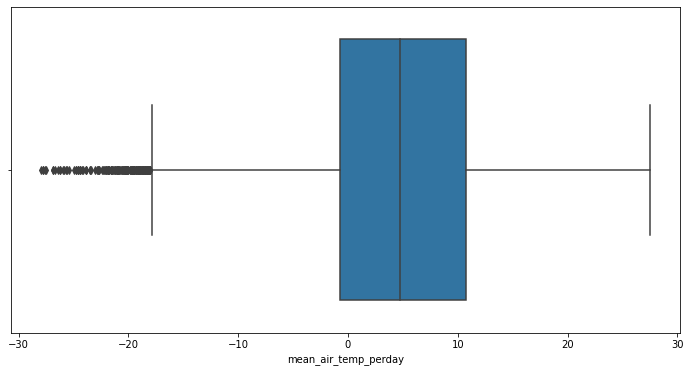

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(meteo['mean_air_temp_perday'])
plt.show()

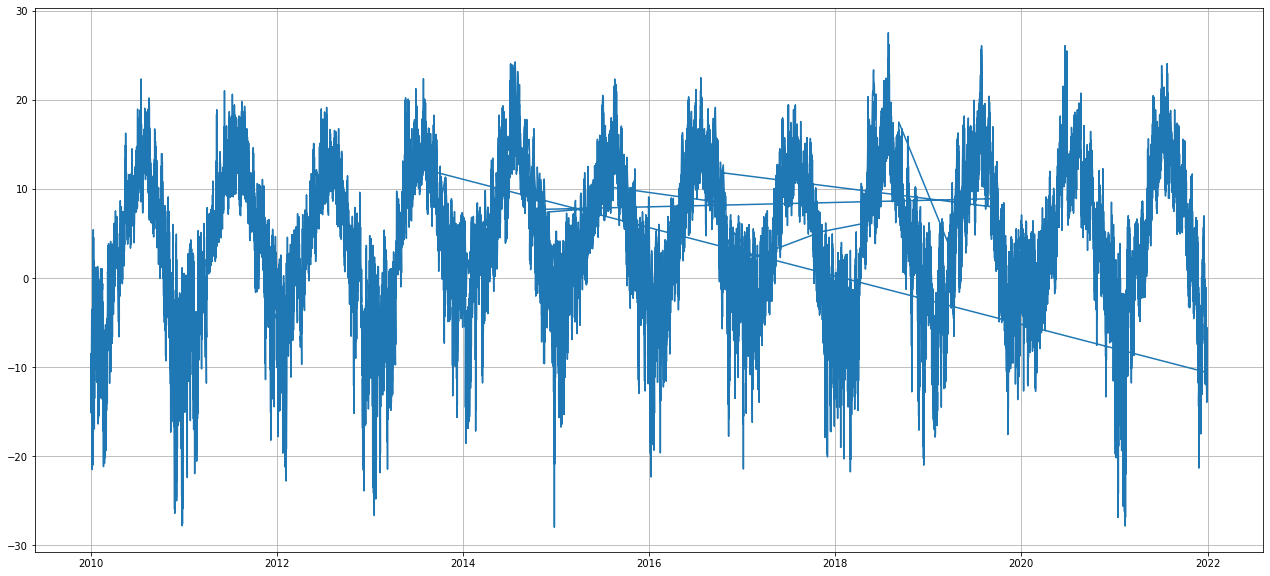

In [ ]:
f = plt.figure()
f.set_figwidth(22)
f.set_figheight(10)

plt.plot(meteo['Date'], meteo['mean_air_temp_perday'])
plt.grid()
plt.show()

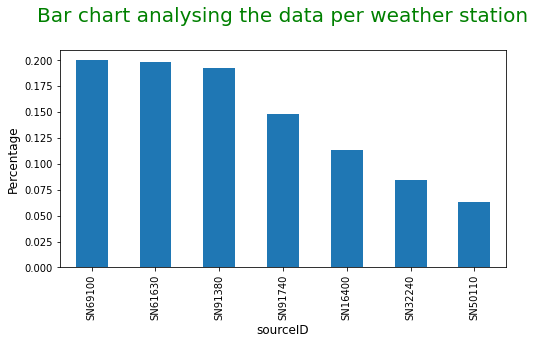

In [ ]:
#Segment column
plt.figure(figsize= (8,4))
meteo["sourceID"].value_counts(normalize=True).plot.bar()
plt.title("Bar chart analysing the data per weather station\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("sourceID", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

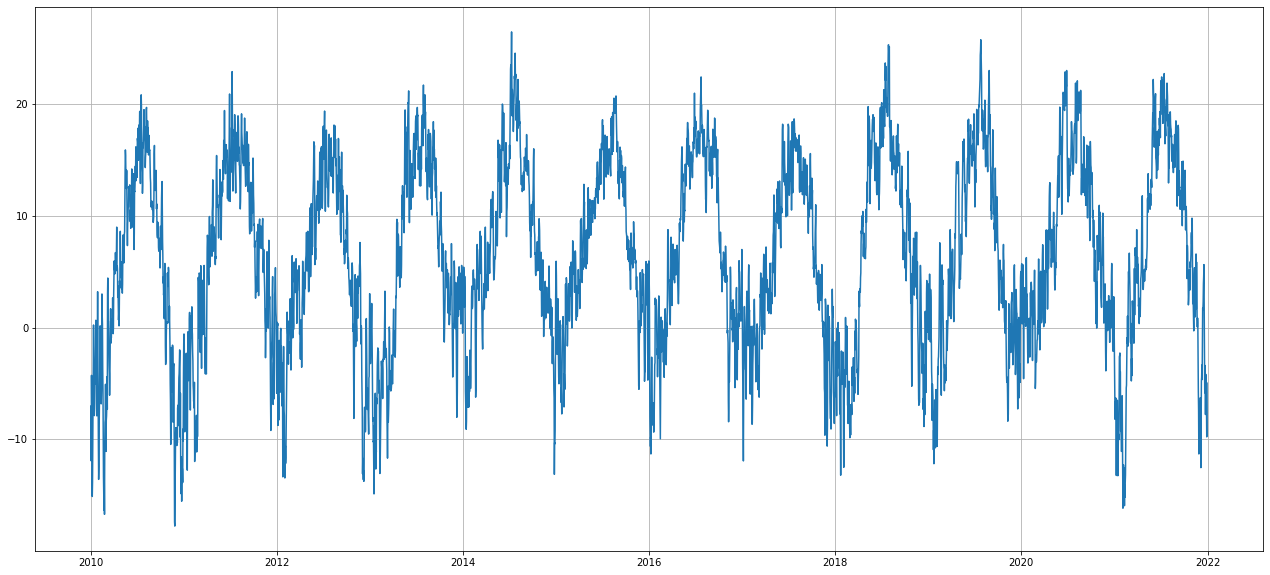

,T_mean,Date
0,-7.025,2010-01-01
1,-11.925,2010-01-02
2,-4.275,2010-01-03
3,-7.250,2010-01-04
4,-15.050,2010-01-05
...,...,...
4377,-5.050,2021-12-26
4378,-4.500,2021-12-27
4379,-6.750,2021-12-28
4380,-9.775,2021-12-29


In [ ]:
day = meteo['Date'].unique()
temperatury = []
date = []

for y in day:

  df_tmp = meteo[meteo['Date'] == y]
                 
  max = df_tmp['max_air_temp_perday'].max()
  min = df_tmp['mean_air_temp_perday'].min()
  mean = (max + min) / 2 

  date.append(y)
  temperatury.append(mean)

meteo_mean_day = pd.DataFrame({'T_mean' : temperatury , 'Date' : date})

f = plt.figure()
f.set_figwidth(22)
f.set_figheight(10)

plt.plot(meteo_mean_day['Date'], meteo_mean_day['T_mean'])
plt.grid()
plt.show()

pd.to_datetime(meteo_mean_day['Date']).dt.to_period('m')
meteo_mean_day

Decomposizione additiva

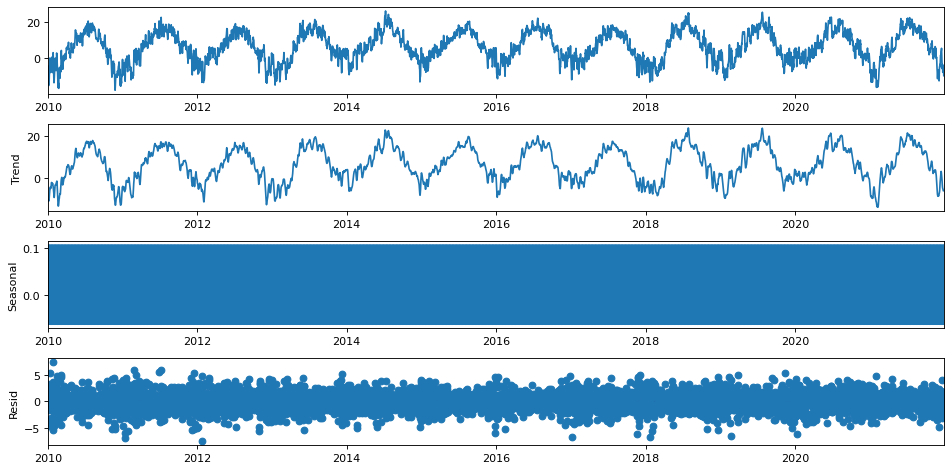

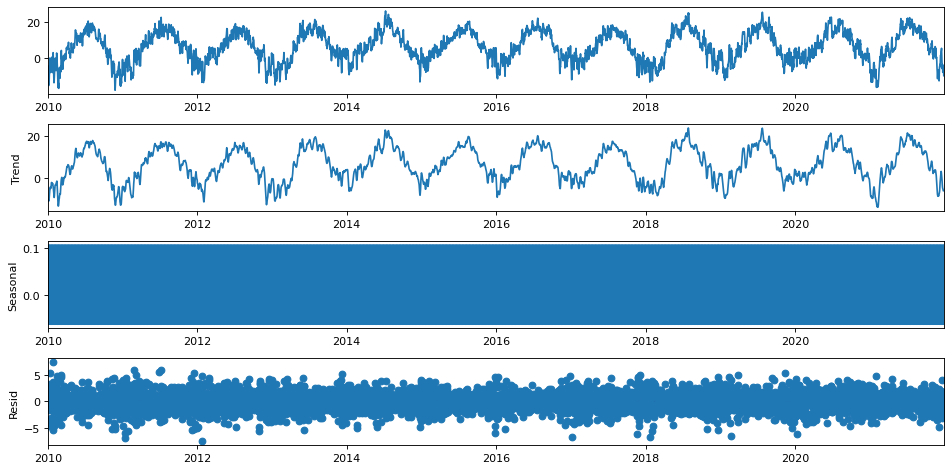

In [ ]:
data = []
for x in meteo_mean_day['T_mean']:
  data.append(x)
  
index = []
for x in meteo_mean_day['Date']:
  index.append(x)

serie_temporale = pd.Series(data, index=index)


#crimesPerMonth_ts.index = crimesPerMonth_ts.index.to_timestamp() # todo once: seasonal_decompose does not accept PeriodIndex
add_decomposition = seasonal_decompose(serie_temporale, model='additive') #dal grafico sopra si evince che è additiva
add_decomposition.plot()
#plt.title("additive decomposition")
plt.grid(b=True, which='major', axis='x')
plt.xticks(data,data)
plt.xlabel('')

print(index)

In [ ]:
data = []
for x in  meteo['mean_air_temp_perday']:
  data.append(x)
  
index = []
for x in meteo['Date']:
  index.append(x)


print(len(data))
print(len(index))

print(index)
serie_temporale = pd.Series(data, index=index)


#crimesPerMonth_ts.index = crimesPerMonth_ts.index.to_timestamp() # todo once: seasonal_decompose does not accept PeriodIndex
add_decomposition = seasonal_decompose(serie_temporale, model='multiplicative') #dal grafico sopra si evince che è additiva
add_decomposition.plot()

21799
21799
[Timestamp('2010-01-01 00:00:00'), Timestamp('2010-01-01 00:00:00'), Timestamp('2010-01-01 00:00:00'), Timestamp('2010-01-02 00:00:00'), Timestamp('2010-01-02 00:00:00'), Timestamp('2010-01-02 00:00:00'), Timestamp('2010-01-03 00:00:00'), Timestamp('2010-01-03 00:00:00'), Timestamp('2010-01-03 00:00:00'), Timestamp('2010-01-04 00:00:00'), Timestamp('2010-01-04 00:00:00'), Timestamp('2010-01-04 00:00:00'), Timestamp('2010-01-05 00:00:00'), Timestamp('2010-01-05 00:00:00'), Timestamp('2010-01-05 00:00:00'), Timestamp('2010-01-06 00:00:00'), Timestamp('2010-01-06 00:00:00'), Timestamp('2010-01-06 00:00:00'), Timestamp('2010-01-07 00:00:00'), Timestamp('2010-01-07 00:00:00'), Timestamp('2010-01-07 00:00:00'), Timestamp('2010-01-08 00:00:00'), Timestamp('2010-01-08 00:00:00'), Timestamp('2010-01-08 00:00:00'), Timestamp('2010-01-09 00:00:00'), Timestamp('2010-01-09 00:00:00'), Timestamp('2010-01-09 00:00:00'), Timestamp('2010-01-10 00:00:00'), Timestamp('2010-01-10 00:00:00'), T

ValueError: ignored

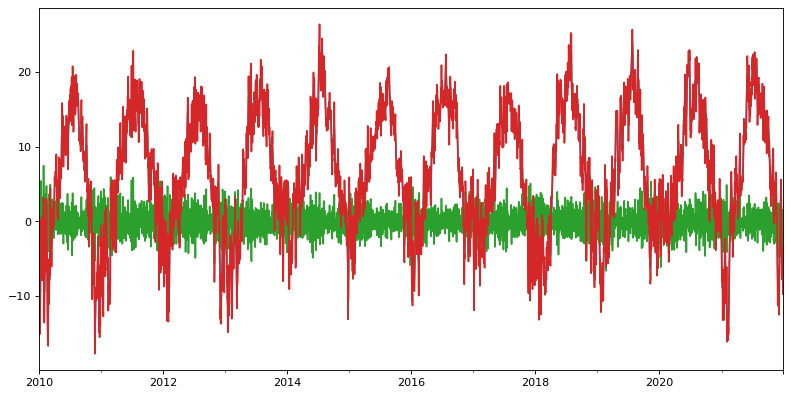

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

# Creiamo una serie temporale di esempio

data = []
for x in meteo_mean_day['T_mean']:
  data.append(x)
  
index = []
for x in meteo_mean_day['Date']:
  index.append(x)

serie_temporale = pd.Series(data, index=index)

# Decomporre la serie temporale in componenti
result = seasonal_decompose(serie_temporale)

# Visualizzare le componenti
result.trend.plot()
result.seasonal.plot()
result.resid.plot()
result.observed.plot()


In [ ]:
meteo_mean_month = meteo_mean_day

meteo_mean_month['Date'].to_datetime()

meteo_mean_month['Date'] = pd.to_datetime(meteo_mean_month['Date']).dt.to_period('m') # Converting the Order Date to month-Year format

meteo_mean_month.head()


month = meteo['Date'].unique()
temperatury = []
date = []

for y in month:

  df_tmp = meteo[meteo['Date'] == y]
                 
  max = df_tmp['max_air_temp_perday'].max()
  min = df_tmp['mean_air_temp_perday'].min()
  mean = (max + min) / 2 

  date.append(y)
  temperatury.append(mean)

meteo_mean_month = pd.DataFrame({'T_mean' : temperatury , 'Date' : date})

f = plt.figure()
f.set_figwidth(22)
f.set_figheight(10)

plt.plot(meteo_mean_day['Date'], meteo_mean_day['T_mean'])
plt.grid()
plt.show()




AttributeError: ignored